# Identification of Differentially Expressed Genes for Ectopic Pregnancy

Reem Almugbel

## 1. Motivation and Overview

When a woman's pregnancy test result is positive, initial testing of the uterus is visualized on transvaginal ultrasound scan (TVS). The possible outcomes of the TVS scan are (figure 1): 
(i) Intrauterine pregnancy (IUP) which is the case of normal pregnancy with fertilized egg implanted normally inside the uterus 
(ii) Ectopic Pregnancy (EP) where the fertilized egg can be seen in the TVS scan, but it is implanted outside the uterus 
(iii) Pregnancy of Unknown Location (PUL) when the pregnancy test is positive but no evidence of pregnancy is seen on TVS ultrasound scan [1].
Cases of pregnancy of unknown locations (PUL) can subsequently lead to one of the following: outcomes: 
(i)Failing PUL (miscarriage): majority of women (50-70%) will subsequently be diagnosed with failing PUL 
(ii) Normal IUP: fertilized egg is too early to be visualized on TVS 
(iii) Ectopic pregnancy: in 7-20% of the PUL cases, the fertilized egg implanted outside the uterus is too early to be visualized or missed on the initial TVS examination [1, 2]. 
The case of failing PUL includes two possibilities: a failing IUP or a failing EP. Although both cases end up with miscarriage, it is important to distinguish between them. A definitive diagnosis with EP has significant clinical consequences, such as determining the possibility of a repeat EP, the need for assisted reproductive technologies or workup for potential recurrent pregnancy loss [1]. 	




<img src="images/PUL.png">

*Figure 1. Outcome of initial TVS scan. PUL = Pregnancy of unknown location; TVS = Transvaginal ultrasound scan; EP= Ectopic pregnancy [1]*





In the case of PUL, a close surveillance is required with serial office visits, ultrasounds and blood draws over as long as a six-week period [3]. During this surveillance period, no medical or surgical intervention is taken until a conclusive diagnosis of ectopic pregnancy is reached, and non-viability of the embryo is concluded [3]. Thus, clinicians’ objective is to: (1) Diagnose ectopic pregnancy as early as possible to avoid health risks, (2) Ensure that this early diagnosis is correct, to avoid ending a viable pregnancy erroneously [4].	Delayed diagnosis of EP is the most common life-threatening emergency in early pregnancy [3]. EP patients are at high risk of tubal rupture and catastrophic hemorrhage, and it is an important cause of maternal death [3]. Despite the high frequency of this serious condition, early diagnosis of EP can be challenging.

In practice, there are several methods used to detect EP in the case of PUL, and they largely depend on biochemical markers such as serum progesterone levels [5] and serum human chorionic gonadotrophin (hCG) levels [6]. Biochemical markers patterns used detect EP are not consistent [7], and the International Society of Ultrasound in Obstetrics and Gynecology is encouraging the use of mathematical models to support the process of EP early detection [8].
In this case study, we aim to identify differentially expressed genes among patients with EP by conducting microarray analysis of gene expression data. Differentially expressed genes are a subset of genes that exhibit expression patterns associated with a EP medical condition.


-------------

## 2. Data
Microarray gene expression data generated by Duncan et al. [9] are publicly available from the ArrayExpress database (http://www.ebi.ac.uk/arrayexpress) with accession number E-MTAB-680. Duncan et. al collected gestation-matched endometrium from women with EP (n = 11) and intrauterine pregnancies (IUP) (n = 13), and samples were profiled using the Affymetrix Human Genome U133 Plus 2.0 platform.  The CEL files were normalized using RMA (Robust Multiarray Average) [9].


-------------

## 3. Analysis

# 3.1 Data Filtering
The first step towards building reproducible analysis is to prepare it for validation by independent future cohorts. To achieve that, we filtered the dataset to exclude probe identifiers that do not map to gene names and kept only the genes that are common with prospective validation dataset on Affymetrix genechip Human Gene 2.0 ST. AnnotationDbi [10] and Stringr [11] Bioconductor[14] packages were used access, map, and process gene identifiers in specific chip annotation databases [12,13].

#### Task: Find common probes between Duncan's data set and validation dataset

* Duncan's GeneChip: Human Genome U133 Plus 2.0
* Validation dataset GeneChip: Human Gene 2.0 ST

Two methods are proposed to find the common set of probes between the two gene chips:

**Method 1**: Use AnnotationDbi to get annotation packages for the two chips,then for each chip map probe ids to Entrez ids, and finally find the intersection between the two set of Entrez ids

**Method 2**: Use Duncan's dataset gene symbols to compare with Human Gene 2.0 ST Annotationdb package and remove any gene symbol that doesn't have a match in HG 2.0 ST annotations




#### 3.1.1 Method 1: Find intersection between Entrez IDs found in Annotationdb packages for both chips

* Use Bioconductor package: AnnotationDbi Package (Platform level)
https://www.bioconductor.org/packages/release/bioc/vignettes/AnnotationDbi/inst/doc/IntroToAnnotationPackages.pdf
* Validation chip package:  hugene20stprobeset.db
* Duncan's chip packages:  hgu133plus2.db


#### Step1: Download & Explore Annotation Packages

In [27]:
#Download AnnotationDbi
#source("https://bioconductor.org/biocLite.R")
#biocLite("AnnotationDbi")

#Download chip packages
#validation chip: Gene 2.0 ST
#biocLite("hugene20stprobeset.db")
library(hugene20stprobeset.db)
ls("package:hugene20stprobeset.db")

#Duncan's chip: Human Gene U133 Plus 2.0 
#biocLite("hgu133plus2.db")
library(hgu133plus2.db)

[1] "hugene20stprobeset"              "hugene20stprobeset_dbconn"      
 [3] "hugene20stprobeset_dbfile"       "hugene20stprobeset_dbInfo"      
 [5] "hugene20stprobeset_dbschema"     "hugene20stprobeset.db"          
 [7] "hugene20stprobesetACCNUM"        "hugene20stprobesetALIAS2PROBE"  
 [9] "hugene20stprobesetCHR"           "hugene20stprobesetCHRLENGTHS"   
[11] "hugene20stprobesetCHRLOC"        "hugene20stprobesetCHRLOCEND"    
[13] "hugene20stprobesetENSEMBL"       "hugene20stprobesetENSEMBL2PROBE"
[15] "hugene20stprobesetENTREZID"      "hugene20stprobesetENZYME"       
[17] "hugene20stprobesetENZYME2PROBE"  "hugene20stprobesetGENENAME"     
[19] "hugene20stprobesetGO"            "hugene20stprobesetGO2ALLPROBES" 
[21] "hugene20stprobesetGO2PROBE"      "hugene20stprobesetMAP"          
[23] "hugene20stprobesetMAPCOUNTS"     "hugene20stprobesetOMIM"         
[25] "hugene20stprobesetORGANISM"      "hugene20stprobesetORGPKG"       
[27] "hugene20stprobesetPATH"          "hugene20stprobesetPATH2PROBE"   
[29] "hugene20stprobesetPFAM"          "hugene20stprobesetPMID"         
[31] "hugene20stprobesetPMID2PROBE"    "hugene20stprobesetPROSITE"      
[33] "hugene20stprobesetREFSEQ"        "hugene20stprobesetSYMBOL"       
[35] "hugene20stprobesetUNIGENE"       "hugene20stprobesetUNIPROT"

In [28]:
# Explore Annotation db
#list the contents of the package
ls("package:hugene20stprobeset.db")


[1] "hugene20stprobeset"              "hugene20stprobeset_dbconn"      
 [3] "hugene20stprobeset_dbfile"       "hugene20stprobeset_dbInfo"      
 [5] "hugene20stprobeset_dbschema"     "hugene20stprobeset.db"          
 [7] "hugene20stprobesetACCNUM"        "hugene20stprobesetALIAS2PROBE"  
 [9] "hugene20stprobesetCHR"           "hugene20stprobesetCHRLENGTHS"   
[11] "hugene20stprobesetCHRLOC"        "hugene20stprobesetCHRLOCEND"    
[13] "hugene20stprobesetENSEMBL"       "hugene20stprobesetENSEMBL2PROBE"
[15] "hugene20stprobesetENTREZID"      "hugene20stprobesetENZYME"       
[17] "hugene20stprobesetENZYME2PROBE"  "hugene20stprobesetGENENAME"     
[19] "hugene20stprobesetGO"            "hugene20stprobesetGO2ALLPROBES" 
[21] "hugene20stprobesetGO2PROBE"      "hugene20stprobesetMAP"          
[23] "hugene20stprobesetMAPCOUNTS"     "hugene20stprobesetOMIM"         
[25] "hugene20stprobesetORGANISM"      "hugene20stprobesetORGPKG"       
[27] "hugene20stprobesetPATH"          "hugene20stprobesetPATH2PROBE"   
[29] "hugene20stprobesetPFAM"          "hugene20stprobesetPMID"         
[31] "hugene20stprobesetPMID2PROBE"    "hugene20stprobesetPROSITE"      
[33] "hugene20stprobesetREFSEQ"        "hugene20stprobesetSYMBOL"       
[35] "hugene20stprobesetUNIGENE"       "hugene20stprobesetUNIPROT"

In [29]:
ls("package:hgu133plus2.db")


[1] "hgu133plus2"              "hgu133plus2_dbconn"      
 [3] "hgu133plus2_dbfile"       "hgu133plus2_dbInfo"      
 [5] "hgu133plus2_dbschema"     "hgu133plus2.db"          
 [7] "hgu133plus2ACCNUM"        "hgu133plus2ALIAS2PROBE"  
 [9] "hgu133plus2CHR"           "hgu133plus2CHRLENGTHS"   
[11] "hgu133plus2CHRLOC"        "hgu133plus2CHRLOCEND"    
[13] "hgu133plus2ENSEMBL"       "hgu133plus2ENSEMBL2PROBE"
[15] "hgu133plus2ENTREZID"      "hgu133plus2ENZYME"       
[17] "hgu133plus2ENZYME2PROBE"  "hgu133plus2GENENAME"     
[19] "hgu133plus2GO"            "hgu133plus2GO2ALLPROBES" 
[21] "hgu133plus2GO2PROBE"      "hgu133plus2MAP"          
[23] "hgu133plus2MAPCOUNTS"     "hgu133plus2OMIM"         
[25] "hgu133plus2ORGANISM"      "hgu133plus2ORGPKG"       
[27] "hgu133plus2PATH"          "hgu133plus2PATH2PROBE"   
[29] "hgu133plus2PFAM"          "hgu133plus2PMID"         
[31] "hgu133plus2PMID2PROBE"    "hgu133plus2PROSITE"      
[33] "hgu133plus2REFSEQ"        "hgu133plus2SYMBOL"       
[35] "hgu133plus2UNIGENE"       "hgu133plus2UNIPROT"

In [30]:
help("ENTREZID")

In [31]:
#List the possible values for columns

columns(hugene20stprobeset.db)
columns(hgu133plus2.db)

# Same columns in both packages

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

In [32]:
# To know what kinds of data are retriveable via select
# List the possible values for keytypes

keytypes(hugene20stprobeset.db)
keytypes(hgu133plus2.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "MAP"          "OMIM"        
[16] "ONTOLOGY"     "ONTOLOGYALL"  "PATH"         "PFAM"         "PMID"        
[21] "PROBEID"      "PROSITE"      "REFSEQ"       "SYMBOL"       "UCSCKG"      
[26] "UNIGENE"      "UNIPROT"




#### Step2: Extract Prob Id - Entrez id matching for each packages

In [33]:

#Select and save ProbID-Entrez for Human Gene U133 Plus 2.0

allKeys_u133 = keys(hgu133plus2.db)
print(length(allKeys_u133))
print(length(unique(allKeys_u133))) #all unique


# to check how many Entrez ids available in the db
entrezIDs = keys(hgu133plus2.db ,  keytype = "ENTREZID")
print(length(entrezIDs))


[1] 54675
[1] 54675
[1] 22503


##### Note: 
Less than half of the prob ids have a matching entrez id. According to Allen et al. "On an average, the number of unique Entrez IDs represented by a platform is on the order of 50% of the number of probes. All of the Illumina and Agilent platforms as well as Affymetrix U133 Plus 2 covered around 20 000 unique Entrez IDs" [15].

In [34]:
# Select method is used for mapping keys(prob ids) with column(Entrez id)

hgu133_probid_entrez = select(hgu133plus2.db, keys=allKeys_u133,columns = c( "ENTREZID" ) ,keytype = "PROBEID")

dim(hgu133_probid_entrez)


'select()' returned 1:many mapping between keys and columns


[1] 58537     2

#### Note:
Select help page shows the following warning:
“select will retrieve the data as a data.frame based on parameters for selected keys columns and keytype arguments. Users should be warned that if you call select and request columns that have multiple matches for your keys, select will return a data.frame with one row for each possible match”


In [35]:
#Delete N/A and duplicated Entrez ID

print(sum(is.na(hgu133_probid_entrez$ENTREZID)))

#Delete N/A
hgu133_probid_entrez <- hgu133_probid_entrez[complete.cases(hgu133_probid_entrez),]

#Delete Duplicated
print(length(unique(hgu133_probid_entrez$ENTREZID)))
hgu133_probid_entrez <- hgu133_probid_entrez[!duplicated(hgu133_probid_entrez$ENTREZID), ]
print(dim(hgu133_probid_entrez))


[1] 9942
[1] 22434
[1] 22434     2


#### Repeat the previous steps to extract Entrez ids for validation chip using hugene20stprobeset.db

In [36]:
#Select and save ProbID-Entrez for Gene 2.0 ST

allKeys_gene20 = keys(hugene20stprobeset.db)
gene20st_probid_entrez <- select(hugene20stprobeset.db, keys=allKeys_gene20,columns = c( "ENTREZID" ), keytype = "PROBEID")
dim(gene20st_probid_entrez)

'select()' returned 1:many mapping between keys and columns


[1] 370521      2

In [37]:
#delete N/A and duplicated Entrez ID
print(sum(is.na(gene20st_probid_entrez$ENTREZID)))
gene20st_probid_entrez <- gene20st_probid_entrez[complete.cases(gene20st_probid_entrez),]
gene20st_probid_entrez <- gene20st_probid_entrez[!duplicated(gene20st_probid_entrez$ENTREZID), ]


[1] 76409


In [38]:
dim(hgu133_probid_entrez)  #all unique entrezIDs
dim(gene20st_probid_entrez) #all unique entrezIDs


[1] 22434     2

[1] 29726     2

#### Step3: Find the intersection
To find the intersection: iterate through hgu133 ids and keep the ones that has a match in gene20st

In [39]:
entrez_interset <- hgu133_probid_entrez[hgu133_probid_entrez$ENTREZID %in% gene20st_probid_entrez$ENTREZID,]

In [40]:
dim(entrez_interset)

[1] 21744     2

In [41]:
entrez_interset[20:28,]


,PROBEID,ENTREZID
22,1552266_at,203102
23,1552269_at,128153
24,1552271_at,163154
26,1552274_at,54899
28,1552276_a_at,57617
29,1552277_a_at,91283
30,1552278_a_at,113235
32,1552280_at,91937
33,1552281_at,283375


#### Note:
It is expected to have duplicated probe ids, because multiple probes are mapped to the same gene

In [42]:
length(unique(entrez_interset$PROBEID))
length(unique(entrez_interset$ENTREZID))

[1] 20683

[1] 21744

List of common Gene IDs with at least one unique Entrez Ids has 21744 genes
#### Sanity Check:
To check the correctness of this mapping, we used NetAffx Expression Array Comparison Tool (results shown below)


The numbers are not exact but close enough to prove sanity

<img src="images/mapping1.png">

#### Step4: Load Duncan's dataset and filter it using the set of commen genes
The goal of this step is to keep expression data only for the genes that are commen between the two studies: validation and Duncan's


In [43]:

setwd('/data/')
getwd()


[1] "/Users/reem/Desktop/PUL/DuncanData"

In [44]:

#Read Duncan's dataset
Dndata <- read.table("Duncans_NormalisedData.txt", header = FALSE ,  sep="\t", na.strings=c("","NA"))
colnames(Dndata) <- as.character(unlist(Dndata[1,]))
Dndata = Dndata[-1, ]
colnames(Dndata)[1] <- "ProbID"


In [61]:
# Change options to show all columns
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

# Take a look at the data
dim(Dndata)
Dndata[100:102,]


[1] 23073    30

,ProbID,1-1,1-2,1-3,1-4,1-6,2-1,2-2,2-3,2-6,2-7,2-8,2-9,2-12,3-1,3-10,3-11,3-3,3-6,3-7,3-4,3-5,3-9,3-12,3-13,Unigene(Avadis),Gene Symbol,Gene Title,DN_entrez,GO(Avadis)
101,201167_x_at,-0.3110628,0.23771667,-0.10152149,0.29800653,0.065270424,-0.18545485,0.16876173,0.20941973,0.39917326,0.16233301,0.55084276,0.3334241,-0.033890247,-0.031142712,-0.57114077,-0.15604448,0.28138208,0.031142712,0.1376977,-0.038221836,-0.27555895,-0.8327193,-0.9276171,-1.1537127,Hs.159161,ARHGDIA,Rho GDP dissociation inhibitor (GDI) alpha,396,GO:0006916|GO:0006928|GO:0007162|GO:0007266|GO:0005737|GO:0005856|GO:0005094|GO:0005094|GO:0005096|GO:0005515|GO:0005515|GO:0042802
102,201168_x_at,-0.37716246,-0.0072875023,0.09138155,0.113250256,0.1856718,0.6218314,0.058036327,0.0072875023,0.053887367,0.07398939,0.48067617,0.21108532,0.09278917,-0.10594368,0.066678524,-0.24010134,-0.08874273,-0.11394167,-0.4310727,-0.082458496,-0.32932806,-0.7162614,-0.6356778,-0.69664145,Hs.159161,ARHGDIA,Rho GDP dissociation inhibitor (GDI) alpha,396,GO:0006916|GO:0006928|GO:0007162|GO:0007266|GO:0005737|GO:0005856|GO:0005094|GO:0005094|GO:0005096|GO:0005515|GO:0005515|GO:0042802
103,201169_s_at,0.31867456,0.546844,0.13963318,0.7161155,0.34326553,1.0850191,0.07108545,-0.28080177,-0.035256863,-0.033113956,0.33439493,-0.7205286,-0.021288872,-0.47553444,-0.51992226,-0.6353178,-0.44392824,-0.62522316,0.021288395,1.1589985,0.92747784,-0.95492506,-0.1598897,1.8188181,Hs.719093,BHLHE40,"basic helix-loop-helix family, member e40",8553,GO:0006350|GO:0006355|GO:0006355|GO:0009649|GO:0045449|GO:0045892|GO:0048168|GO:0005634|GO:0005634|GO:0003677|GO:0003700|GO:0005515|GO:0005515|GO:0016564|GO:0030528


In [46]:
#Duncan's data has a coloumn for Entrez ID
names(Dndata)
# Change its name to seperate it from ou Entrez IDs that we extracted based on mapping with validation's chip
colnames(Dndata)[29] <- "DN_entrez"


[1] "ProbID"          "1-1"             "1-2"             "1-3"            
 [5] "1-4"             "1-6"             "2-1"             "2-2"            
 [9] "2-3"             "2-6"             "2-7"             "2-8"            
[13] "2-9"             "2-12"            "3-1"             "3-10"           
[17] "3-11"            "3-3"             "3-6"             "3-7"            
[21] "3-4"             "3-5"             "3-9"             "3-12"           
[25] "3-13"            "Unigene(Avadis)" "Gene Symbol"     "Gene Title"     
[29] "Entrez Gene"     "GO(Avadis)"

In [47]:
# Copmare Duncan's dataset with entrez_intersect (common Entrez between Duncan's & validation's) 
# Keep only the rows that exist in th entrez_intersect dataframe 

cleaned_Dndata <- Dndata[Dndata$DN_entrez %in% entrez_interset$ENTREZID,]
dim(cleaned_Dndata)


[1] 16075    30

** Result**: 16075 unique common prob ids

#### 3.1.2 Method 2: Delete Entrez IDs found in Duncan's dataset that has no match in validation dataset chip annotation

The main difference between this method and the previous one is that here we are using Entrez ids provided with Duncan's data set instead of using the chip annotationdb

** Method 2 Summary: **
* for each Entrez ID in Duncan’s dataset: if it exists in the list of validation’s gene ids (using validation's chip annotationdb) -> keep its expression data. Otherwise, delete it

#### Step 1: Save Duncan's data set Prob id - Entrez id annotation in a separate annotation data frame

In [48]:
# From Duncan's data saet, save the ProbIDs and thier matching Entrez IDs in a data frame

dnkn_annot <- data.frame("ProbID" = Dndata$ProbID,"Entrez"=Dndata$DN_entrez)
sum(is.na(dnkn_annot$Entrez))

#Remove NA
dnkn_annot <- dnkn_annot[complete.cases(dnkn_annot),]
sum(is.na(dnkn_annot$Entrez))

#Reset index numbers
rownames(dnkn_annot) <- 1:nrow(dnkn_annot)

#Check the number of unique Probe IDs
length(unique(dnkn_annot$ProbID))

[1] 6029

[1] 0

[1] 17044

#### Step 2: Check for 1-to-many  Prob id - Entrez id mapping 

In [49]:
dnkn_annot[2637:2640,]

,ProbID,Entrez
2637,207126_x_at,54575 /// 54576 /// 54578 /// 54600 /// 54657 /// 54658
2638,207127_s_at,3189
2639,207128_s_at,7766
2640,207129_at,11238


#### Step 3: Use string processing to convert 1-to-many mapping to 1-to-1 mapping

To achive that, we need to tokenize Entrez id with multiples using "stringr" R package [11], save it in a separate list with 1-to-1 Prob id-Entrez id in each row with duplicated prob ids. And finally, merge it back with the annotation file. The result is a list of all the prob ids mapped to one Entrez ids

In [50]:
#count how many probID has multiple Entrez ID
library(stringr)
f <- str_detect(dnkn_annot$Entrez," /// ")
table(f)

f
FALSE  TRUE 
16571   473 

In [51]:
#Save all ProbID with multiple EntrezIDs in a new dataframe multis_df, and remove them from dnkn_annot
multis = which(str_detect((dnkn_annot$Entrez), " /// "))
multis_df = dnkn_annot[multis,]

#Remove them from original Duncan's data frame
dnkn_annot = dnkn_annot[-multis,]

In [52]:
#Create new data frame to save the 1-1 probID-EntrezID after tokenizing the Entrez IDs
newDF <-data.frame(ProbID = "",Entrez = "")
newDF = newDF[-1, ]
newDF

ProbID,Entrez


In [53]:
#For each ProbID, extract the mulitiple Entrez IDs, tokenize them save them in a single row for each match
for(i in 1:length(multis_df$ProbID)){  
  prob = multis_df[i,"ProbID"]
  multi_entrez = (multis_df[i,]$Entrez)
  tokens = ""
  tokens = unlist(strsplit(as.character(multi_entrez), " /// "))
  for(j in 1:length(tokens)){
    newRow <-data.frame(ProbID = prob ,Entrez = tokens[j])
    newDF <- rbind(newDF,newRow)}
}

In [54]:
# Check how many prob ids in total, and how many unique prob ids
length(newDF$ProbID)
length(unique(newDF$ProbID))

[1] 1552

[1] 473

#### Step 4: Merge the 1-to-1 mapping data frame back to the original annotation data frame

In [55]:
#Bind the newDF with the annotation dataframe
dnkn_annot <- rbind(dnkn_annot,newDF)
#Check if we still have the same number of unique ProbID
length(unique(dnkn_annot$ProbID)) 

[1] 17044

#### Step 5: Filter the annotation data frame to keep only the common Entrez ids

In [56]:
# Filter dnkn annotation file based on validation Entrez Ids
# For each Entrez id in dnkn, check if it exists in validation annotation file
# if found -> keep it, if not -> remove it
# this will keep only Duncan's prob ids that matches to Entrez ids that can be foun in validation chip annotation 
dnkn_annot <- dnkn_annot[dnkn_annot$Entrez %in% gene20st_probid_entrez$ENTREZID,]

In [57]:
length(unique(dnkn_annot$ProbID)) 

[1] 16556

#### Step 6: Use the annotation data frame of common ids to filter Duncan's data set

In [58]:
#Filter Duncan's data set based on dnkn_annot
cleaned_dnkn <- Dndata[Dndata$ProbID %in% dnkn_annot$ProbID,]
rownames(cleaned_dnkn) <- 1:nrow(cleaned_dnkn)


In [62]:
# View the resulting data set
cleaned_dnkn[15:17,]

,ProbID,1-1,1-2,1-3,1-4,1-6,2-1,2-2,2-3,2-6,2-7,2-8,2-9,2-12,3-1,3-10,3-11,3-3,3-6,3-7,3-4,3-5,3-9,3-12,3-13,Unigene(Avadis),Gene Symbol,Gene Title,DN_entrez,GO(Avadis)
15,201134_x_at,0.07517338,-0.016327858,-0.046474457,0.016327858,-0.030067444,-0.032431602,0.18730164,0.02158451,-0.021525383,0.07353115,0.1255722,-0.18535995,0.12330341,0.12546635,-0.08269405,-0.08533192,0.14199924,-0.053646088,0.032141685,-0.04371357,-0.07262421,0.025531769,0.069773674,-0.1191988,Hs.430075,COX7C,cytochrome c oxidase subunit VIIc,1350,GO:0006091|GO:0005739|GO:0005743|GO:0016020|GO:0016021|GO:0004129
16,201135_at,-0.024981499,-0.31466675,-0.25818062,-0.2569132,-0.239851,-0.34195328,0.26798916,-0.07606506,-0.23470592,-0.3232422,0.077243805,0.22052002,0.32012367,0.32147026,-0.22538853,-0.11428547,0.21165466,0.03972435,0.30858326,0.024981499,0.101346016,0.25293827,0.26718903,-0.50407887,Hs.76394,ECHS1,"enoyl Coenzyme A hydratase, short chain, 1, mitochondrial",1892,GO:0006629|GO:0006631|GO:0006635|GO:0008152|GO:0005739|GO:0005739|GO:0005759|GO:0005759|GO:0003824|GO:0004300|GO:0004300|GO:0004300|GO:0005515|GO:0016829
17,201136_at,-0.6119633,0.25724697,-0.119407654,0.14261055,0.1424284,0.3103752,0.062069893,0.16355515,0.3386507,0.21758842,-0.41397762,-0.35539055,-0.09719372,-0.104634285,0.18022633,0.31104088,-0.57398796,0.03323555,-0.43462467,0.015542984,-0.015542984,-0.4066639,-0.922925,-0.5856123,Hs.77422,PLP2,proteolipid protein 2 (colonic epithelium-enriched),5355,GO:0006811|GO:0006935|GO:0019221|GO:0005624|GO:0005783|GO:0005789|GO:0005886|GO:0016020|GO:0016021|GO:0005515|GO:0015075|GO:0019956


** Result**: 16556 unique Prob id that has at least one Entrez id that could be found in validation chip annotation
* Original Duncan’s dataset has **23,073** ProbID
* Filtered Duncan’s dataset has **16,556** ProbID


The filtered Duncan's dataset resulted from mapping method 2 has more genes. Hence, we will use it
for future analyses

In [60]:
# Save results
save(cleaned_dnkn , file="cleaned_dnkn.RData")
write.table (cleaned_dnkn, file="cleaned_dnkn.txt", sep="\t", row.names=F, col.names=T)


-------------

### 3.2 Differential Expression Analysis

#### 3.2.1 Prepare Dataset


#### a. Rename columns to match samples
At this point, we need to go back to Duncan's paper to recognize which columns belong to IUP samples and EP samples:

"endometrium was collected from women with EP (n = 11) and intrauterine pregnancies (IUP) (n = 13). The numbers are the codes for the samples (IUP; 1- is from viable intrauterine [termination of pregnancy] and 2- is from non-viable intrauterine pregnancy [miscarriage]. EP; 3- is from tubal ectopic pregnancy)."


In [64]:
# Fix sample names
dnkn <- cleaned_dnkn[,1:25]
new.dim.vec1 <- paste("IUP_", dimnames(dnkn)[[2]][2:14], sep="")
new.dim.vec2 <- paste("EP_", dimnames(dnkn)[[2]][15:25], sep="")
new_names <- c(new.dim.vec1, new.dim.vec2)
colnames(dnkn)[2:25] <- new_names
dnkn[1:5,]

ProbID,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,IUP_2-8,IUP_2-9,IUP_2-12,EP_3-1,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
AFFX-HUMISGF3A/M97935_5_at,1.2458911,0.8702588,0.18894291,1.6912346,0.99243927,-0.4539609,0.7203388,0.681005,1.4764352,0.9700742,-0.20305347,-0.026069641,-0.32908058,-0.029337883,-1.1400542,-1.3750572,0.4748578,-0.05281353,0.14449835,-0.3943181,0.026069641,-0.6325941,-0.6212578,-0.4345703
AFFX-HUMISGF3A/M97935_MA_at,0.7670746,0.86345196,0.50142574,1.431756,0.8667526,-0.09318304,0.37866306,0.384099,1.387557,0.6220045,0.17463732,-0.08514786,-0.260314,-0.08763409,-0.33055067,-0.57410145,0.3495512,-0.2618065,-0.3472123,-0.6001191,-0.1928668,-0.3330183,0.08514786,-0.5344763
AFFX-HUMISGF3A/M97935_MB_at,0.82664394,0.41105366,1.0975475,1.3726578,0.54579973,0.026741982,0.18358469,0.35748243,0.9914999,0.2870903,-0.09917259,-0.72989225,0.23639679,-0.5256753,-0.026741505,-0.746469,0.027445793,-0.37563515,-0.45024633,-0.5693712,-0.14760923,-0.44113064,-0.23121548,-0.9545984
AFFX-HUMISGF3A/M97935_3_at,0.5775118,0.37527084,1.0126591,0.9346113,0.6084337,0.5532627,0.12812233,-0.027256012,0.80613613,0.1951704,0.37762356,-0.48760223,0.25863266,-0.54689217,0.027256012,-0.6085434,-0.20446968,-0.23906994,-0.62317467,-0.3329773,-0.10221672,-0.37796116,-0.20989418,-0.9787588
AFFX-HUMGAPDH/M33197_5_at,0.022171974,-0.10383892,-0.07950401,0.14785671,0.12661552,0.36004066,0.1196146,0.07192612,-0.054935455,-0.03736782,-0.18863487,-0.044675827,-0.08798027,0.33276844,-0.26588726,-0.19025421,0.2690897,0.06596279,0.4825325,0.011844635,0.3939619,-0.023115158,-0.011845589,-0.5721159


#### b. Change row names

In [65]:
# Change row name to be ProbID 
temp <- dnkn[,-1]
rownames(temp) <- dnkn[,1]
dnkn <- temp
rm(temp)
dnkn[11:14,]


,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,IUP_2-8,IUP_2-9,IUP_2-12,EP_3-1,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
1007_s_at,0.4577713,-0.46173954,-0.1196928,-0.48988152,0.08466816,-0.4882536,0.598938,-0.0025491714,-0.49738216,-0.23571968,0.0025491714,0.459383,0.32079887,-0.15930462,-0.52388763,-0.6624479,-0.09043789,0.06870937,0.587409,0.7918968,0.905983,-0.46767807,0.17822456,0.008805275
1053_at,0.11463547,0.118311405,0.0130057335,0.22673893,-0.10918474,0.13954306,-0.027605534,0.21260881,0.26084614,-0.013005257,0.05807352,-0.08291817,-0.21280432,0.24836874,-0.0557642,-0.45793915,0.3115301,0.21829796,-0.07591772,-0.57869387,-0.13225651,0.19241095,-0.37840986,-0.42458344
117_at,-0.33622122,-0.09207392,0.50230646,-0.028620243,0.77237797,1.1439972,-0.08660221,-0.036183834,0.02741766,0.080863476,0.033674717,-0.17710066,0.1254878,-0.23113298,0.19769573,-0.539031,0.05311489,-0.49619055,0.068068504,-0.02741766,1.3870745,-0.88622,0.19153214,-0.6012745
201133_s_at,0.10234451,-0.3448143,0.2290535,-0.2780466,-0.27282524,-0.05865097,0.05521202,-0.12864399,-0.15436745,-0.20512772,0.15825558,0.17819786,0.111846924,0.028266907,0.15010071,-0.070775986,-0.028266907,0.30719185,0.17357445,-0.031274796,-0.07279873,0.14195156,-0.4212103,0.072546005


#### c. Convert data frame to a matrix

In [67]:

#Convert data frame to matrix
dnkn.mat <- matrix(as.numeric(as.character(unlist(dnkn))),nrow=nrow(dnkn))
rownames(dnkn.mat) <- rownames(dnkn)
colnames(dnkn.mat) <- colnames(dnkn)



In [68]:
dnkn.mat[15:17,]

,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,IUP_2-8,IUP_2-9,IUP_2-12,EP_3-1,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
201134_x_at,0.07517338,-0.01632786,-0.04647446,0.01632786,-0.03006744,-0.0324316,0.18730164,0.02158451,-0.02152538,0.07353115,0.1255722,-0.1853599,0.12330341,0.1254664,-0.08269405,-0.08533192,0.1419992,-0.05364609,0.03214169,-0.04371357,-0.07262421,0.02553177,0.06977367,-0.1191988
201135_at,-0.02498150,-0.31466675,-0.25818062,-0.25691320,-0.23985100,-0.3419533,0.26798916,-0.07606506,-0.23470592,-0.32324220,0.0772438,0.2205200,0.32012367,0.3214703,-0.22538853,-0.11428547,0.2116547,0.03972435,0.30858326,0.02498150,0.10134602,0.25293827,0.26718903,-0.5040789
201136_at,-0.61196330,0.25724697,-0.11940765,0.14261055,0.14242840,0.3103752,0.06206989,0.16355515,0.33865070,0.21758842,-0.4139776,-0.3553906,-0.09719372,-0.1046343,0.18022633,0.31104088,-0.5739880,0.03323555,-0.43462467,0.01554298,-0.01554298,-0.40666390,-0.92292500,-0.5856123


#### 3.2.2 T-test
The first statistical test conducted to identify differentially expressed genes is the independent two group t-test, the most common tests in statistics. It is a statistical method used to determine if the distributions of values of a feature for two different classes (EP vs. IUP) are distinct. We used the standard t-test implementation (“t.test”) in R for this task.


In [69]:
# Perform the t-test
p.vec <- apply (dnkn.mat, 1, function (x) {t.test (x[1:13], x[14:25])$p.value})

#check number of p-values
length (p.vec)

#Round the numbers to 2 decimal values
p.vec[16:17]
round(p.vec[16:17], 2)



[1] 16556

201135_at 201136_at 
0.1496902 0.1212639

201135_at 201136_at 
     0.15      0.12

In [70]:
# Nuber of DE genes using threshold of p < 0.5
sum(p.vec < 0.05)

[1] 3918

This high number of DGEs is more likely due to multiple testing. We can try more stringent thresholds

In [71]:
# Nuber of DE genes using threshold of p < 0.01
sum(p.vec < 0.01)

[1] 1702

In [72]:
# Nuber of DE genes using threshold of p < 0.001
sum(p.vec < 0.001)

[1] 440

In [73]:
# Nuber of DE genes using threshold of p < 0.0001
sum(p.vec < 0.0001)

[1] 104

In [74]:
# Nuber of DE genes using threshold of p < 0.00001
sum(p.vec < 0.00001)

[1] 20

In [75]:
# Check DEGs at p-value= 0.01
de.ind.t <- which (p.vec < 0.01)
length(de.ind.t)
# Save indices for DE genes
DE.vec.t <- dimnames(dnkn)[[1]][de.ind.t]
# Save ProbIDs for DE genes
DE.vec.prb <- dnkn[DE.vec.t,"ProbID"] 


[1] 1702

In [76]:
# Save ttest DE probes in a new matrix
ttest.DE.mat <- dnkn.mat[de.ind.t,]
dim(ttest.DE.mat)

[1] 1702   24

#### 3.2.2 T-test with Bonferroni correction for multiple testing

In [79]:
# Perform the t.test with Bonferroni correction
adj.p.vec1 <- p.adjust (p.vec, method="bonferroni")
de.ind <- which (adj.p.vec1 < 0.05)
length(de.ind)

# Save ProbIDs for DE genes
DE.vec <- dimnames(dnkn)[[1]][de.ind]

# Save Bonferroni DE probes in a new matrix
bonfr.DE.mat <- dnkn.mat[de.ind,]

[1] 6

In [80]:
# Print DE Dene names from Bonferroni t-test
print(as.character( cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.vec),"Gene Symbol"]))


[1] "HNRNPF" "CSH2"   "CSHL1"  "GATA3"  "TM2D1"  "ATG7"  


#### 3.2.4 Benjamini–Hochberg Test
Benjamini-Hochberg false discovery detection method is also another test used for correction. It was used by Duncan et al. to correct for multiple testing [9]. 

In [83]:
q <- p.adjust(p.vec, method = "BH")
de.indBen <- which (q < 0.05)
length(de.indBen)

# Save indices for DE genes
DE.Ben.vec <- dimnames(dnkn)[[1]][de.indBen]


# Save ProbIDs for DE genes
DE.Ben2 <- dnkn[DE.Ben.vec,"ProbID"]


print(unique(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.Ben.vec),"Gene Symbol"])))

[1] 712

  [1] "STAT1"                                                    
  [2] "MFN2"                                                     
  [3] "PUM1"                                                     
  [4] "ARHGDIA"                                                  
  [5] "NUDC"                                                     
  [6] "CHD4"                                                     
  [7] "ATP1B1"                                                   
  [8] "AKR1B1"                                                   
  [9] "MYL12A"                                                   
 [10] "VAMP3"                                                    
 [11] "BAZ2A"                                                    
 [12] "TMEM109"                                                  
 [13] "ANXA7"                                                    
 [14] "HNRNPF"                                                   
 [15] "DHX15"                                                    
 [16] "UCH

In [84]:
# Save Benjamini–Hochberg DE probes in a new matrix
fdr.DE.mat <- dnkn.mat[de.indBen,]

#### 3.2.5 LIMMA
LIMMA (Linear Models for Microarrays) is an established method for differential expression analyses of microarray. LIMMA accounts for the experimental design and uses an empirical Bayes approach to estimate the variance among samples [16]. It has been shown to be a robust method for data with small sample sizes [17]. LIMMA R package was used and two-group design matrix was considered [18]

In [86]:
# Install and Load LIMMA library
#source("https://bioconductor.org/biocLite.R")
#biocLite("limma")
library(limma)


In [87]:
#Design MAtrix
design <- cbind (IUP=1, IUPvsEP=c(rep(0, 13), rep(1, 11)))
fit <- lmFit (dnkn.mat, design)
fit <- eBayes (fit)


In [88]:
toptable.mat <- topTable (fit, coef="IUPvsEP", adjust="fdr", number=nrow(dnkn.mat))
toptable.mat[1:5,]


,logFC,AveExpr,t,P.Value,adj.P.Val,B
207770_x_at,-1.5585437,0.3077038,-7.313616,1.274809e-07,0.0009283077,7.532989
208294_x_at,-2.2662044,0.4832173,-7.208143,1.633415e-07,0.0009283077,7.307816
208342_x_at,-2.5452846,0.6039091,-7.079438,2.214599e-07,0.0009283077,7.030767
208356_x_at,-2.9627354,1.0557969,-6.987170,2.758193e-07,0.0009283077,6.830635
203085_s_at,-0.7776663,-0.1307939,-6.980333,2.803539e-07,0.0009283077,6.815757


In [89]:
# Number of genes with adjusted p-value less than 0.05
sum(toptable.mat$adj.P.Val < 0.05)

[1] 1533

In [90]:
# Number of genes with adjusted p-value less than 0.01
sum(toptable.mat$adj.P.Val < 0.01)

[1] 271

In [93]:
# Number of genes with adjusted p-value less than 0.001
sum(toptable.mat$adj.P.Val < 0.001)

[1] 5

In [94]:
# Save DE genes at p < 0.05
DE.limma <- rownames(toptable.mat[toptable.mat$adj.P.Val < 0.05,])

# Print all DE gene names
#unique(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% DE.limma),"Gene Symbol"]))

# Print LIMMA's top 10 DE gene names from LIMMA
for(i in 1:10){
  print(as.character( cleaned_dnkn[which(cleaned_dnkn$ProbID == DE.limma[i]),"Gene Symbol"]))}

[1] "CSH2"
[1] "CSHL1"
[1] "CSH2"
[1] "CSH1"
[1] "TGFB1"
[1] "SESN1"
[1] "CSH1"
[1] "CSHL1"
[1] "TM2D1"
[1] "GIMAP7"


In [95]:
# Save Limma's top DE (adj.P.Val < 0.05) probes in a new matrix
limma.DE.mat <- dnkn.mat[DE.limma,]


#### 3.2.6 SAM Analysis
SAM (Significance Analysis of Microarrays) is essentially a robust version of the t-test that accounts for cases with low variance by adding a correction term in the denominator of the t-test [19]. In addition, SAM gives estimates of the False Discovery Rate (FDR), which is the proportion of genes likely to have been wrongly identified by chance as being significant. We used the “samr” R package [20] to perform this analysis

In [96]:
# Load "samr" library 
library(samr)

Loading required package: impute
Loading required package: matrixStats
matrixStats v0.51.0 (2016-10-08) successfully loaded. See ?matrixStats for help.

Attaching package: ‘matrixStats’

The following objects are masked from ‘package:Biobase’:

    anyMissing, rowMedians



SAM analysis requires a list object containing the following:
* a data object with expression values (Duncan's matrix in this case) in a form of p genes by n samples matrix (missing values allowed)
* a vector of length n of outcome measurements
* a vectors of gene names and gene IDs, both of length p
* a boolean indicating whether the data is log2-transformed [21]

 First, we create a vector of outcome measurements: IUP samples are labeled as “2” and EP samples are labeled as “1”

In [98]:
# Vector of outcome measurements
y <- c(rep(2, 13), rep(1, 11))  
y 


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1

In [99]:
# Gene names = probe ids (row names)
genenames <- rownames(dnkn.mat)
genenames[15:20]

[1] "201134_x_at" "201135_at"   "201136_at"   "201137_s_at" "201138_s_at"
[6] "201139_s_at"

In [118]:
# Create SAM's list object
data <- list(x = dnkn.mat , y = y, geneid = genenames, genenames = genenames, logged2 = TRUE)

# Perform SAM analysis of “Two class unpaired” type
samr.obj <- samr(data, resp.type = "Two class unpaired", nperms = 100)
names(samr.obj)


perm= 1
perm= 2
perm= 3
perm= 4
perm= 5
perm= 6
perm= 7
perm= 8
perm= 9
perm= 10
perm= 11
perm= 12
perm= 13
perm= 14
perm= 15
perm= 16
perm= 17
perm= 18
perm= 19
perm= 20
perm= 21
perm= 22
perm= 23
perm= 24
perm= 25
perm= 26
perm= 27
perm= 28
perm= 29
perm= 30
perm= 31
perm= 32
perm= 33
perm= 34
perm= 35
perm= 36
perm= 37
perm= 38
perm= 39
perm= 40
perm= 41
perm= 42
perm= 43
perm= 44
perm= 45
perm= 46
perm= 47
perm= 48
perm= 49
perm= 50
perm= 51
perm= 52
perm= 53
perm= 54
perm= 55
perm= 56
perm= 57
perm= 58
perm= 59
perm= 60
perm= 61
perm= 62
perm= 63
perm= 64
perm= 65
perm= 66
perm= 67
perm= 68
perm= 69
perm= 70
perm= 71
perm= 72
perm= 73
perm= 74
perm= 75
perm= 76
perm= 77
perm= 78
perm= 79
perm= 80
perm= 81
perm= 82
perm= 83
perm= 84
perm= 85
perm= 86
perm= 87
perm= 88
perm= 89
perm= 90
perm= 91
perm= 92
perm= 93
perm= 94
perm= 95
perm= 96
perm= 97
perm= 98
perm= 99
perm= 100


[1] "n"                    "x"                    "xresamp"             
 [4] "y"                    "argy"                 "censoring.status"    
 [7] "testStatistic"        "nperms"               "nperms.act"          
[10] "tt"                   "numer"                "sd"                  
[13] "sd.internal"          "s0"                   "s0.perc"             
[16] "evo"                  "perms"                "permsy"              
[19] "nresamp"              "nresamp.perm"         "all.perms.flag"      
[22] "ttstar"               "ttstar0"              "eigengene"           
[25] "eigengene.number"     "pi0"                  "foldchange"          
[28] "foldchange.star"      "sdstar.keep"          "resp.type"           
[31] "resp.type.arg"        "assay.type"           "stand.contrasts"     
[34] "stand.contrasts.star" "stand.contrasts.95"   "depth"               
[37] "call"

In [119]:
# Compute thresholds for different delta
delta.table <- samr.compute.delta.table(samr.obj, min.foldchange = 1.5) 



Computing delta table
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


In [120]:
# Check delta corresponding to median FDR 0.1
delta.table[delta.table[, "median FDR"] < 0.1, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
         0.00000000         89.53581783        191.48810099       1141.00000000 
         median FDR       90th perc FDR               cutlo               cuthi 
         0.07847136          0.16782480         -0.76511251          0.92794043

In [121]:
# Try median FDR 0.01
delta.table[delta.table[, "median FDR"] < 0.01, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
        1.085667843         6.863372795        33.942498188       795.000000000 
         median FDR       90th perc FDR               cutlo               cuthi 
        0.008633173         0.042694966        -2.726725257         2.182540484

In [122]:
# Try median FDR 0.001
delta.table[delta.table[, "median FDR"] < 0.001, ][1, ]  

delta     # med false pos 90th perc false pos            # called 
        1.600806156         0.000000000         2.495771926       336.000000000 
         median FDR       90th perc FDR               cutlo               cuthi 
        0.000000000         0.007427893        -3.924506855         3.192305322

In [123]:
# Select the delta
delta <- 1.5  

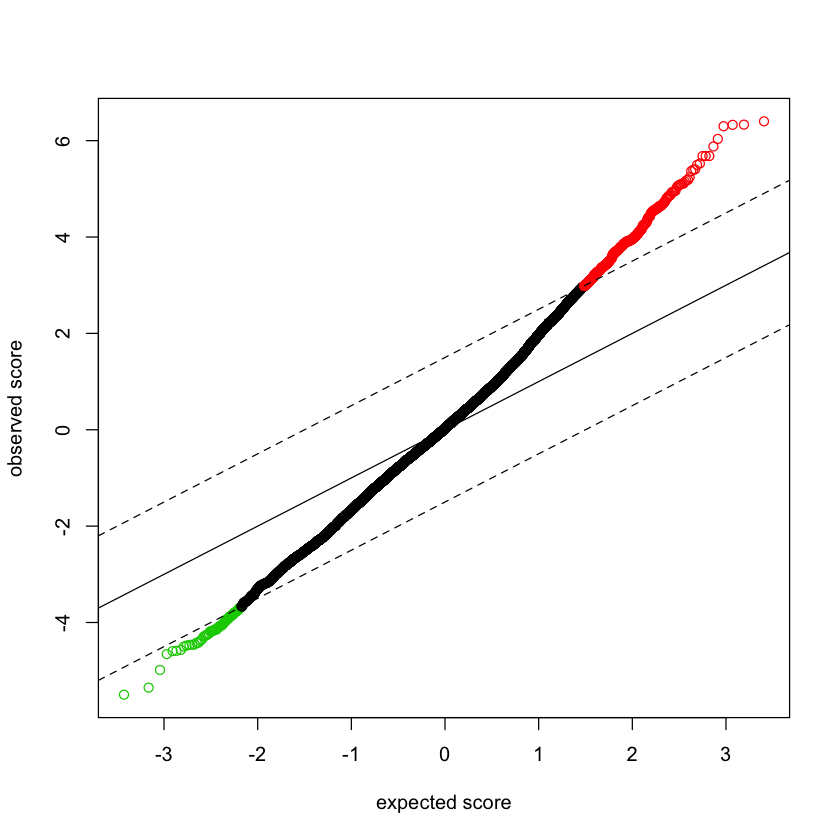

In [124]:
# SAM Plot
samr.plot(samr.obj, delta)

# Red = upregulated genes
# Green = downregulated genes

In [125]:
# Summarize significant genes
siggenes.table <- samr.compute.siggenes.table(samr.obj, delta, data, delta.table, min.foldchange = 1.5)  

# What data we have in the summary list
names(siggenes.table)  

# Number of upregulated genes
nrow(siggenes.table$genes.up)  

# Number of downregulated
nrow(siggenes.table$genes.lo) 


[1] "genes.up"            "genes.lo"            "color.ind.for.multi"
[4] "ngenes.up"           "ngenes.lo"

[1] 373

[1] 42

In [126]:
# Extract upregulated and downregulated gene IDs
up.ids <- siggenes.table$genes.up[, "Gene ID"]  
dn.ids <- siggenes.table$genes.lo[, "Gene ID"]  


In [127]:
#get gene names
print("Down-regulated Genes:")
print(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% dn.ids),"Gene Symbol"]))

print("Up-rsam.ids <- append((up.ids),(dn.ids))
egulated Genes:")
print(as.character(cleaned_dnkn[which(cleaned_dnkn$ProbID %in% up.ids),"Gene Symbol"]))

[1] "Down-regulated Genes:"
 [1] "C5orf13"   "C5orf13"   "EFNB2"     "ZNF124"    "SERPINH1"  "CRISP3"   
 [7] "TTC3"      "GPM6B"     "GPM6B"     "SPON1"     "SPON1"     "ATXN7"    
[13] "ZMYM2"     "TCF3"      "KDM3B"     "SNRNP40"   "TRPS1"     "TPPP3"    
[19] "CCNJ"      "C14orf101" "ZNF587"    "HELLS"     "KCTD15"    "KCTD15"   
[25] "HEY2"      "ENPP3"     "PSAT1"     "RCC2"      "CCBL2"     "STK33"    
[31] "C2orf88"   "AGR3"      "SHROOM3"   "SLC25A37"  "EML4"      "NHS"      
[37] "ZNF711"    "C9orf24"   "SUDS3"     "CDC14B"    "MDM4"      "FUS"      
[1] "Up-rsam.ids <- append((up.ids),(dn.ids))\negulated Genes:"
  [1] "STAT1"                                  
  [2] "STAT1"                                  
  [3] "STAT1"                                  
  [4] "STAT1"                                  
  [5] "TIMP3"                                  
  [6] "TIMP3"                                  
  [7] "TIMP3"                                  
  [8] "CREG1"                    

In [128]:
# Save SAM's DE genes in a matrix

sam.ids <- append((up.ids),(dn.ids))
length(sam.ids)
sam.DE.mat <- dnkn.mat[sam.ids,]
sam.DE.mat[15:17,]

[1] 415

,IUP_1-1,IUP_1-2,IUP_1-3,IUP_1-4,IUP_1-6,IUP_2-1,IUP_2-2,IUP_2-3,IUP_2-6,IUP_2-7,IUP_2-8,IUP_2-9,IUP_2-12,EP_3-1,EP_3-10,EP_3-11,EP_3-3,EP_3-6,EP_3-7,EP_3-4,EP_3-5,EP_3-9,EP_3-12,EP_3-13
206475_x_at,1.16907690,-0.3781216,0.9333382,1.6422992,0.4513388,1.06319710,0.8957639,1.19258310,0.5866623,1.9371676,-0.1187191,0.6000838,1.6515622,-0.38482190,-0.2632120,0.02114201,-0.39264417,-0.2297611,-0.3817773,-0.3451951,-0.5979800,-0.6084869,-0.44141770,-0.02114201
207980_s_at,0.07943058,1.6496572,1.0438461,1.8174772,0.8586645,1.57178210,0.8862248,0.76536370,1.3091660,1.2533922,0.7229691,-0.1453609,-0.3789825,-0.07943058,-0.6294174,-1.40955260,0.42730522,-0.4794731,-0.8661561,-2.8485641,-2.0986610,-3.7720866,-4.03148900,-3.64603570
211656_x_at,-0.07080269,0.2919169,0.8455791,0.2205563,0.9594450,-0.01218033,0.4270668,0.08133984,0.3460836,0.8458681,0.8377218,0.2644653,0.2643051,-0.76613520,-0.3566141,-0.39586306,-0.02229404,-0.4351215,-0.3520641,-0.7182193,-0.3805571,-1.5036473,0.01218033,-0.97502090


-------------

### 3.3 Heatmaps
Heatmaps are created to explore hierarchical clustering of the resulting DEGs and visualize any resulting patterns.

Before generating heatmaps, we need to install RColorBrewer. It is an R packages that uses the work from http://colorbrewer2.org/ to help choose sensible color schemes for heatmaps and figures in R [22]

In [129]:
# Install and load R Color Brewer

# install.packages("RColorBrewer")
library("RColorBrewer")


Modify the distance function to use correlation instead of Euclidean as distance measure [23].

In [9]:
# modify the distance function to use correlation - pearson by default - (based on Yeung et al. [23])

newdist <- function (x) {as.dist (1-cor(t(x)))/2}


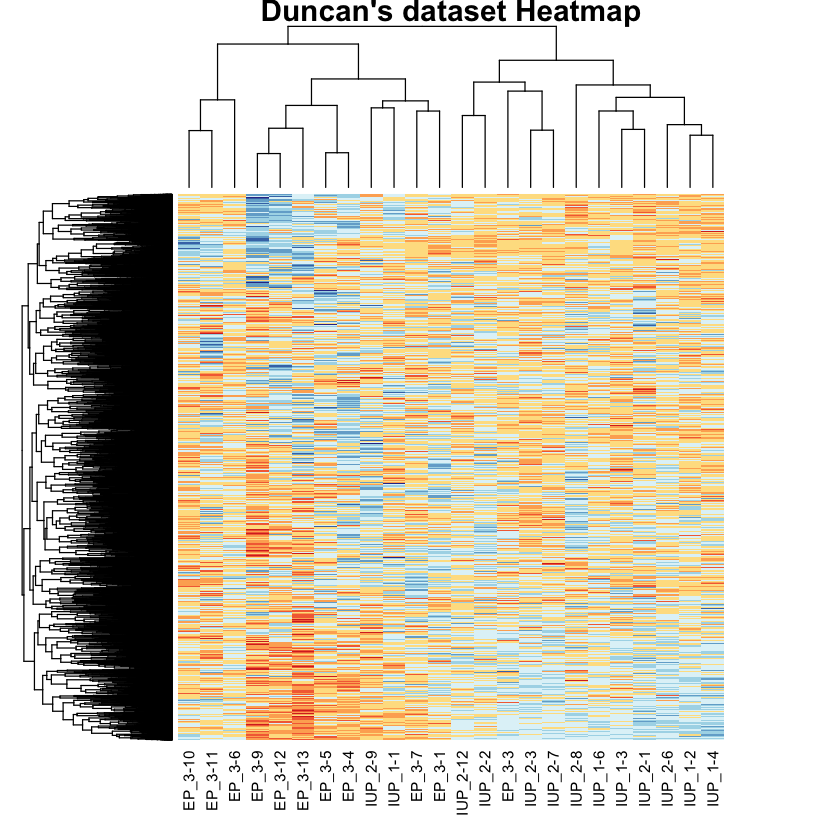

In [131]:
#Duncan's dataset heatmap
heatmap(as.matrix(dnkn.mat), distfun=newdist,labRow = FALSE, col=brewer.pal(10,"RdYlBu"), main = "Duncan's dataset Heatmap")

It is noted in this heatmap that IUP and EP are clustered separately, only two IUP samples are clustered with EP samples (IUP_1-1 & IUP_2-9) and one EP sample EP_3-3 is being grouped with IUP samples.

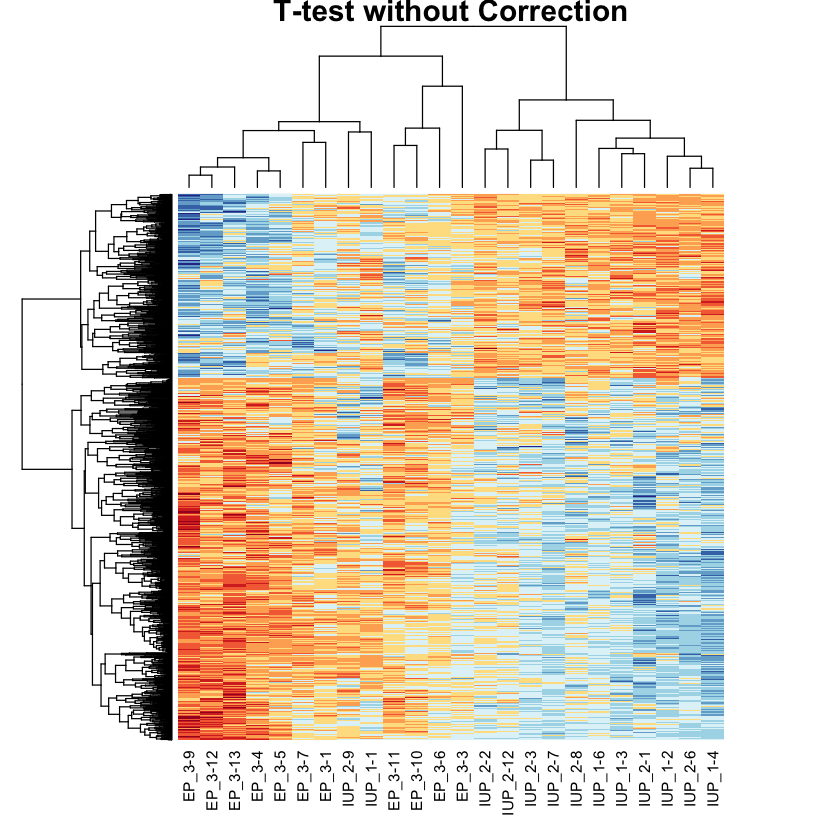

In [133]:
# Heatmap for DE genes resulted from T-test with no correction 
heatmap (as.matrix(ttest.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test without Correction")

Note: IUP_2-9 & IUP_1-1 are still being clustered with EP samples. EP_3-3 is no longer clustered with IUP samples, but still close to IUP expression levels

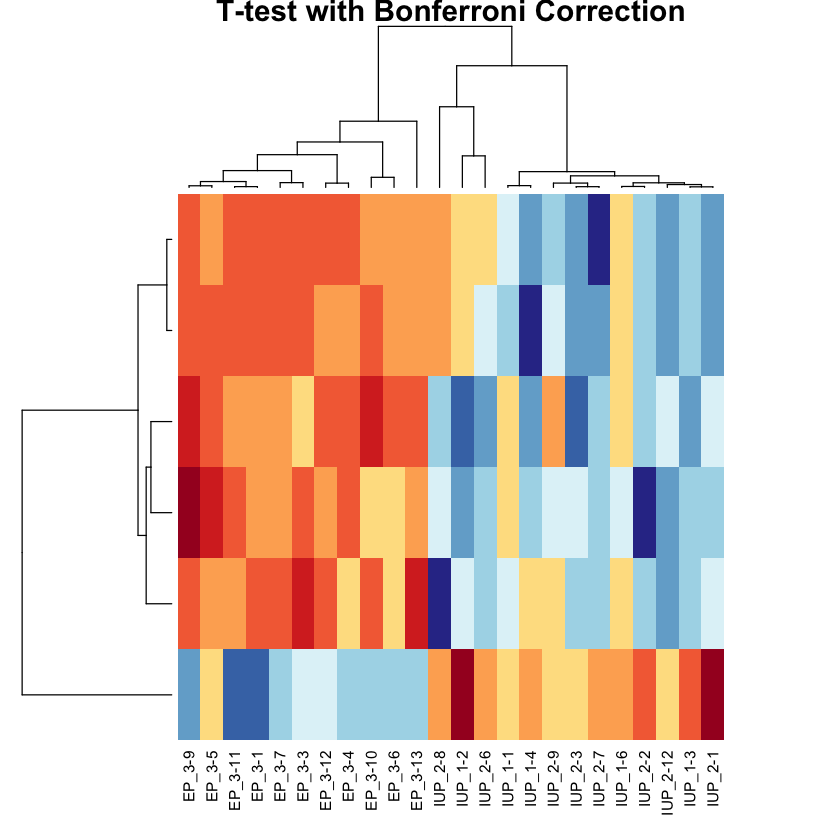

In [134]:
# Heatmap for DE genes resulted from T-test with Bonferroni correction 
heatmap (as.matrix(bonfr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main= "T-test with Bonferroni Correction")

In this heatmap, IUP and EP are being grouped into completely separate clusters

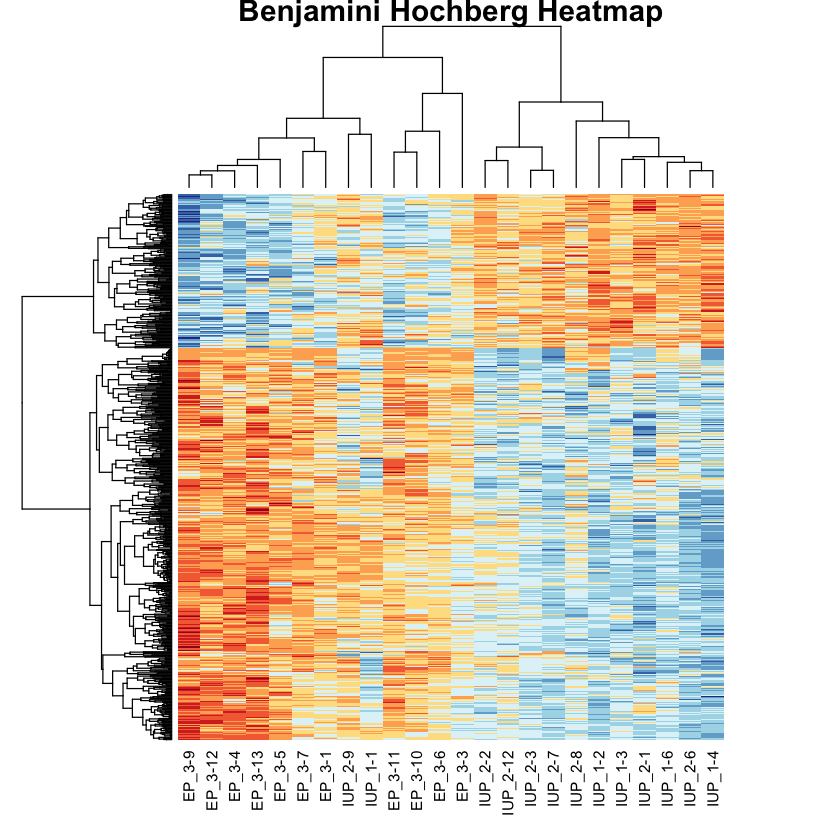

In [135]:
# Heatmap for DE genes resulted from Benjamini Hochberg (FDR)
heatmap (as.matrix(fdr.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="Benjamini Hochberg Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples with same order as in t-test without correction

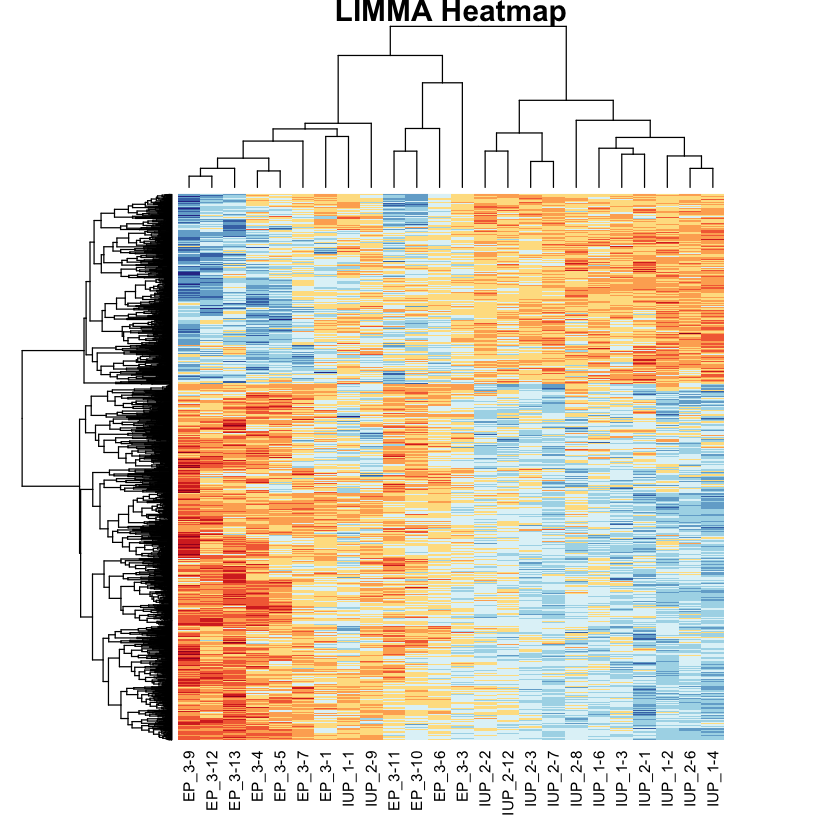

In [136]:
# Heatmap for DE genes resulted from LIMMA
heatmap (as.matrix(limma.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="LIMMA Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples, but with different order than T-test and Benjamini-Hochberg results

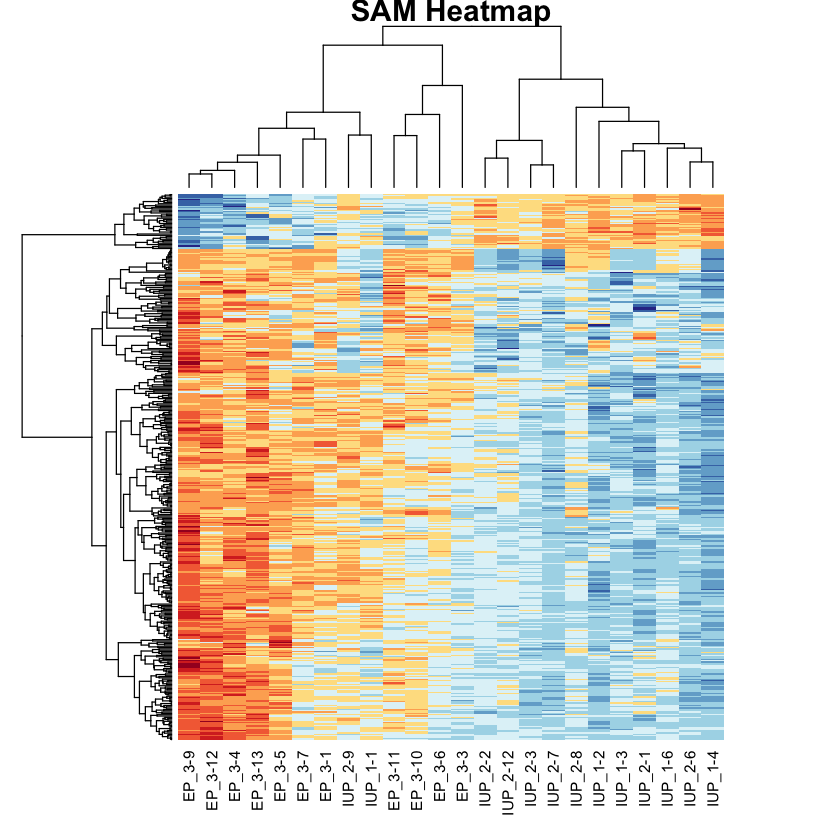

In [138]:
# Heatmap for DE genes resulted from SAM
heatmap (as.matrix(sam.DE.mat), distfun=newdist, labRow = FALSE, , col=brewer.pal(10,"RdYlBu"), main="SAM Heatmap")

IUP_2-9 & IUP_1-1 are still being clustered with EP samples, with the same order in T-test and Benjamini-Hochberg results

After comparing the above heatmaps with the heatmap from Duncan et al., the reason for IUP_2-9 & IUP_1-1 samples to be clustered with EP is the degree of decidualization. According to Duncan et al. [9] IUP_1-2, IUP_1-3, IUP_1-4, IUP_2-6, IUP_2-7, IUP_2-1, and IUP_2-12 are the most decidualized samples, while EP_3-4, EP_3-5, EP_3-9, EP_3-12, and EP_3-13 are non decidualized samples. The rest of the samples are partially decidualized.

-------------

### 3.4 Gene Set Enrichment Analysis (GSEA)
Gene Set Enrichment Analysis (GSEA) is a powerful analytical method used for analyzing the differential expression of groups of genes, rather than individual genes [24]. We used this method to analyze the overlap between Duncan's gene expression data and other groups of genes that share common biological function, chromosomal location, or regulation.

To perform the GSEA analysis we used javaGSEA desktop application for Java 7 and 8 implemented and distributed by Broad Institute [10]. We avoided using open source GSEA R API with R scripts because of the following warning from Broad Institute "Note that this script has not been updated since 2005 and may not work as-is with modern R distributions" [10].


** GSEA Results:**

*	[h: hallmark gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Hallmark/index.html)
*	[c1: all positional gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Positional/index.html)
*	[c2: all curated gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Curated/index.html)
*	[c2: chemical and genetic perturbations](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/ChemicalAndGeneticPerturb/index.html)
*	[c2: all canonical pathways](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/CanonicalPathways/index.html)
*	[c2: BioCarta gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/BioCarta/index.html)
*	[c2: KEGG gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/KEGG/index.html)
*	[c2: Reactome gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Reactome/index.html)
*	[c3: all motif gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Motif/index.html)
*	[c3: microRNA targets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/microRNAtargets/index.html)
*	[c3: transcription factor targets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/TranscritionFactorTargets/index.html)
*	[c4: all computational gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/Computational/index.html)
*	[c4: cancer gene neighborhoods](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/CancerNeighborhoods/index.html)
*	[c4: cancer modules](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/CancerModules/index.html)
*	[c5: all gene ontology (GO) gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/allGO/index.html)
*	[c5: GO biological processes](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/GoBiological/index.html)
*	[c5: GO cellular components](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/GOcellular/index.html)
*	[c5: GO molecular functions](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/GOmolecular/index.html)
*	[c6: oncogenic signatures gene sets](https://nbviewer.jupyter.org/github/ReemUW/EP_CaseStudy/blob/master/GSEA/oncogenicSignatures/index.html)


-------------

## References:


1. Kirk, E., and T. Bourne. "Predicting outcomes in pregnancies of unknown location." Women's health (London, England) 4.5 (2008): 491.
2. Banerjee, Saikat, et al. "Expectant management of early pregnancies of unknown location: a prospective evaluation of methods to predict spontaneous resolution of pregnancy." BJOG: An International Journal of Obstetrics & Gynaecology 108.2 (2001): 158-163.
3. Goldner, Tatiana E., et al. "Surveillance for ectopic pregnancy—United States, 1970–1989." MMWR CDC Surveill Summ 42.6 (1993): 73-85.
4. Boyraz, Gökhan, and Gürkan Bozdağ. "Pregnancy of unknown location." Journal of the Turkish German Gynecological Association 14.2 (2013): 104.
5. Mol, B. W., et al. "The accuracy of single serum progesterone measurement in the diagnosis of ectopic pregnancy: a meta-analysis." Human reproduction13.11 (1998): 3220-3227.
6. Kadar, Nicholas, et al. "The discriminatory human chorionic gonadotropin zone for endovaginal sonography: a prospective, randomized study." Fertility and sterility 61.6 (1994): 1016-1020.
7. Silva, Celso, et al. "Human chorionic gonadotropin profile for women with ectopic pregnancy." Obstetrics & Gynecology 107.3 (2006): 605-610.
8. Condous, G., et al. "Pregnancies of unknown location: consensus statement." Ultrasound in Obstetrics & Gynecology 28.2 (2006): 121-122.
9. Duncan, W. Colin, et al. "Ectopic pregnancy as a model to identify endometrial genes and signaling pathways important in decidualization and regulated by local trophoblast." PLoS One 6.8 (2011): e23595.
10. Hervé Pagès, Marc Carlson, Seth Falcon and Nianhua Li (2017).
  AnnotationDbi: Annotation Database Interface. R package version
  1.36.2.
11. Hadley Wickham (2017). stringr: Simple, Consistent Wrappers for
  Common String Operations. R package version 1.2.0.
  https://CRAN.R-project.org/package=stringr
12. Marc Carlson (2016). hgu133plus2.db: Affymetrix Human Genome U133
  Plus 2.0 Array annotation data (chip hgu133plus2). R package version
  3.2.3.
13. James W. MacDonald (2016). hugene20stprobeset.db: Affymetrix hugene20
  annotation data (chip hugene20stprobeset). R package version 8.5.0.

14. Gentleman R.C., Carey V.J., Bates D.M., Bolstad B., Dettling M., Dudoit S., Ellis B., Gautier L., Ge Y., Gentry J., et al. Bioconductor: open software development for computational biology and bioinformatics. Genome Biol. 2004;5:R80.

15. Jeffrey D. Allen, Siling Wang, Min Chen, Luc Girard, John D. Minna, Yang Xie, Guanghua Xiao; Probe mapping across multiple microarray platforms. Brief Bioinform 2012; 13 (5): 547-554. doi: 10.1093/bib/bbr076

16. Smyth, G. K. (2004). Linear models and empirical Bayes methods for assessing differential expression in microarray experiments. Statistical Applications in Genetics and Molecular Biology 3, Article 3

17. Berkeley, C. A. "Linear models and empirical Bayes methods for assessing differential expression in microarray experiments." E-book available at http://www. bepress. com/sagmb/vol3/iss1/art3.[PubMed] (2004).

18. Ritchie, M.E., Phipson, B., Wu, D., Hu, Y., Law, C.W., Shi, W., and
  Smyth, G.K. (2015). limma powers differential expression analyses for
  RNA-sequencing and microarray studies. Nucleic Acids Research 43(7), E47. 
  
19. Tusher, Virginia Goss, Robert Tibshirani, and Gilbert Chu. "Significance analysis of microarrays applied to the ionizing radiation response." Proceedings of the National Academy of Sciences 98.9 (2001): 5116-5121.

20.  R. Tibshirani, G. Chu, Balasubramanian Narasimhan and Jun Li (2011). samr: SAM: Significance Analysis of Microarrays. R package version  2.0. https://CRAN.R-project.org/package=samr

21. https://mdozmorov.github.io/BIOS567/assets/presentation_diffexpression/DiffExpr_SAM.html

22. Erich Neuwirth (2014). RColorBrewer: ColorBrewer Palettes. R package
  version 1.1-2. https://CRAN.R-project.org/package=RColorBrewer
  
23. Yeung, Ka Yee, Mario Medvedovic, and Roger E. Bumgarner. "Clustering gene-expression data with repeated measurements." Genome biology 4.5 (2003): R34.

24. Subramanian, Aravind, et al. "Gene set enrichment analysis: a knowledge-based approach for interpreting genome-wide expression profiles." Proceedings of the National Academy of Sciences 102.43 (2005): 15545-15550.

25. 10. GSEA, http://software.broadinstitute.org/gsea/downloads.jsp
